## MAXIMIZING THE PROFIT FOR SUSSEX BUDGET PRODUCTIONS.
* A Data-Driven Exploration for profit making movies.

**THE REPORT IS ABOUT GIVING RECOMMENDATIONS TO SUSSEX BUDGET PRODUCTIONS FOR GETTING THE MAXIMUM PROFIT IN NEXT FILM WITH IN 1.5 MILLION BUDGET LIMIT**.

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
cinema = pd.read_csv("/content/movie_metadata.csv")#reading the data

In [294]:
cinema.head(2)#understanding the data structure

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [295]:
cinema.shape[0]

5043

In [296]:
cinema.shape[1]

28

In [297]:
cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## ISSUSES WITH THE DATA.
There are some missing values.  
There are 45 duplicated rows.   
Some of the columns have other datatypes.




## NULL VALUES
**GROSS** had 17% of null values.  

**BUDGET** had 9% of null values.

In [298]:
(cinema.isnull().sum()/len(cinema))*100

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score               

In [299]:
films = cinema.copy()

## REMOVING THE NULL VALUES

In [300]:
# HERE we are removing the null values with respect to gross and budget because we can't fill them by any values.
cinema.dropna(subset=["gross","budget"],inplace= True)

In [301]:
#here we are going to remove the null values in the columns of director_name, actor-1,actor_2,actor_3 columns as we can't replace them.
cinema.dropna(subset=["director_name","actor_1_name","actor_2_name","actor_3_name"],inplace = True)

## DUPLICATES
There are 45 duplicated rows.

In [302]:
cinema.duplicated().sum()

34

## Dropping the Duplicates

In [303]:
#dropping the dplicates
cinema.drop_duplicates(keep="last",ignore_index=True,inplace=True)


In [304]:
cinema.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3845 non-null   object 
 1   director_name              3847 non-null   object 
 2   num_critic_for_reviews     3846 non-null   float64
 3   duration                   3846 non-null   float64
 4   director_facebook_likes    3847 non-null   float64
 5   actor_3_facebook_likes     3847 non-null   float64
 6   actor_2_name               3847 non-null   object 
 7   actor_1_facebook_likes     3847 non-null   float64
 8   gross                      3847 non-null   float64
 9   genres                     3847 non-null   object 
 10  actor_1_name               3847 non-null   object 
 11  movie_title                3847 non-null   object 
 12  num_voted_users            3847 non-null   int64  
 13  cast_total_facebook_likes  3847 non-null   int64

In [305]:
cinema.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
plot_keywords                30
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               47
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 72
movie_facebook_likes          0
dtype: int64

## FILLING THE NULL VALUES

In [306]:
#filling the null values of  num_critic_for_reviews,duration,facenumber_in_poster columns by mean of its columns respectively.
cinema["num_critic_for_reviews"].fillna(int(cinema['num_critic_for_reviews'].mean()),inplace= True)
cinema["duration"].fillna(int(cinema['duration'].mean()),inplace= True)
cinema["facenumber_in_poster"].fillna(int(cinema['facenumber_in_poster'].mean()),inplace= True)

In [307]:
#filling the color column null values with the color because the missing data points year of release is 2010,2011.so,probably the movies are color
cinema["color"].fillna("Color",inplace= True)

In [308]:
cinema.isnull().sum()

#cinema[cinema["num_critic_for_reviews"]==163]

color                         0
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          0
plot_keywords                30
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               47
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 72
movie_facebook_likes          0
dtype: int64

## CHANGING THE DATATYPES
* SOME of the columns had different datatypes they need to changed.

In [309]:
#num_critic_for_reviews,actor_2_facebook_likes,actor_2_facebook_likes,actor_2_facebook_likes,title_year,num_user_for_reviews
#facenumber_in_poster,director_facebook_likes are having float as datatype but they need to be in int has they are discrete data
cinema['actor_1_facebook_likes'] = cinema['actor_1_facebook_likes'].astype("int64")
cinema['actor_2_facebook_likes'] = cinema['actor_2_facebook_likes'].astype("int64")
cinema['actor_3_facebook_likes'] = cinema['actor_3_facebook_likes'].astype("int64")
cinema['director_facebook_likes'] = cinema['director_facebook_likes'].astype("int64")
cinema['num_critic_for_reviews'] = cinema['num_critic_for_reviews'].astype("int64")
cinema['title_year'] = cinema['title_year'].astype("int64")
cinema['num_user_for_reviews'] = cinema['num_user_for_reviews'].astype("int64")
cinema['facenumber_in_poster'] = cinema['facenumber_in_poster'].astype("int64")

In [310]:
cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3847 non-null   object 
 1   director_name              3847 non-null   object 
 2   num_critic_for_reviews     3847 non-null   int64  
 3   duration                   3847 non-null   float64
 4   director_facebook_likes    3847 non-null   int64  
 5   actor_3_facebook_likes     3847 non-null   int64  
 6   actor_2_name               3847 non-null   object 
 7   actor_1_facebook_likes     3847 non-null   int64  
 8   gross                      3847 non-null   float64
 9   genres                     3847 non-null   object 
 10  actor_1_name               3847 non-null   object 
 11  movie_title                3847 non-null   object 
 12  num_voted_users            3847 non-null   int64  
 13  cast_total_facebook_likes  3847 non-null   int64

## DROPPING THE INNAPPROPRIATE COLUMNS

In [311]:
#*aspect_ratio** is not making much impact on the problem statement.
cinema.drop(columns={"aspect_ratio"},inplace = True)

In [312]:
# I was dropping the num_critic_for _reviews,facenumber_in_poster,Plot_keywords,movie_facebook_likes
#and cast_total_facebook_likes,content_rating
cinema.drop(columns={"num_critic_for_reviews","facenumber_in_poster","plot_keywords","movie_facebook_likes",
 "cast_total_facebook_likes","content_rating"},inplace =True)

In [313]:
cinema.drop(columns={"movie_imdb_link","num_user_for_reviews"},inplace = True)

In [314]:
cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   color                    3847 non-null   object 
 1   director_name            3847 non-null   object 
 2   duration                 3847 non-null   float64
 3   director_facebook_likes  3847 non-null   int64  
 4   actor_3_facebook_likes   3847 non-null   int64  
 5   actor_2_name             3847 non-null   object 
 6   actor_1_facebook_likes   3847 non-null   int64  
 7   gross                    3847 non-null   float64
 8   genres                   3847 non-null   object 
 9   actor_1_name             3847 non-null   object 
 10  movie_title              3847 non-null   object 
 11  num_voted_users          3847 non-null   int64  
 12  actor_3_name             3847 non-null   object 
 13  language                 3844 non-null   object 
 14  country                 

## FEATURE ENGINEERING
* For knowing the profit by movies I was adding the column to dataset by subtracting the budget from the gross with the name of **movie_profit**
* we are combining the facebook of all actors in particular rows as **actor_fb_likes** for getting the popularity.

In [315]:
cinema["movie_profit"] = cinema["gross"] - cinema['budget']

In [316]:
cinema["actors_fb_likes"] = cinema["actor_1_facebook_likes"] + cinema["actor_2_facebook_likes"] + cinema["actor_3_facebook_likes"]

#cinema.info()

## COLUMNS TYPES
* **NUMERICAL** gross,budget,imdb_score,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,director_facebook_likes,movie_facebook_likes,num_voted_users,num_critic_for_reviews,cast_total_facebook_likes,movie_profit and duration.
* **CATEGORICAL**  
color,country,language,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,movie_title

**IMDB RATING**   
it negatively skewed.  
it has some outliers.



In [317]:
cinema["imdb_score"].describe()

count    3847.000000
mean        6.462022
std         1.054113
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

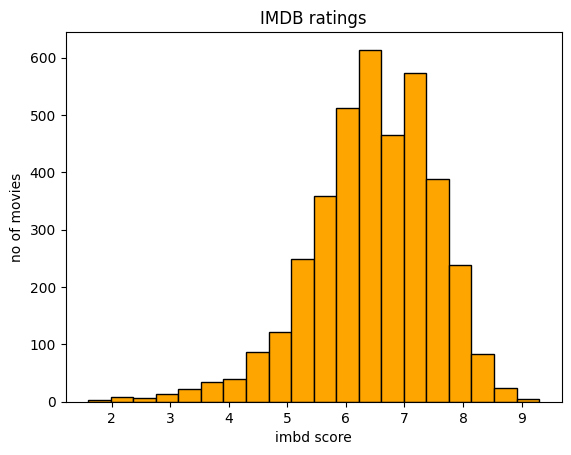

In [318]:

plt.hist(cinema["imdb_score"],bins= 20,edgecolor="black",color="orange")
plt.title("IMDB ratings")
plt.xlabel("imbd score")
plt.ylabel("no of movies")
plt.show()

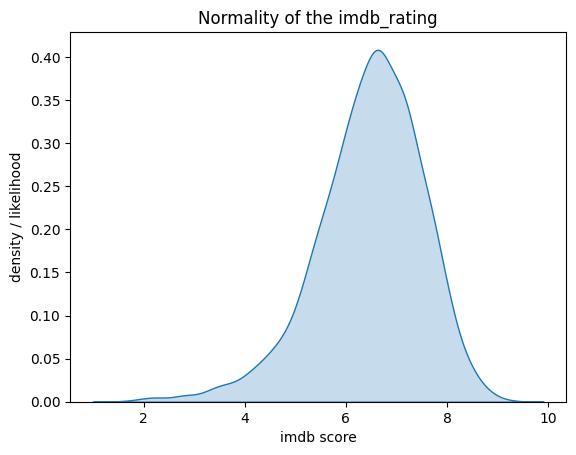

In [319]:
#for checking the normality of the imdb rating
sns.kdeplot(cinema["imdb_score"],fill=True)
plt.title("Normality of the imdb_rating")
plt.xlabel("imdb score")
plt.ylabel("density / likelihood")
plt.show()

In [320]:
cinema['imdb_score'].skew()

-0.7211501720781971

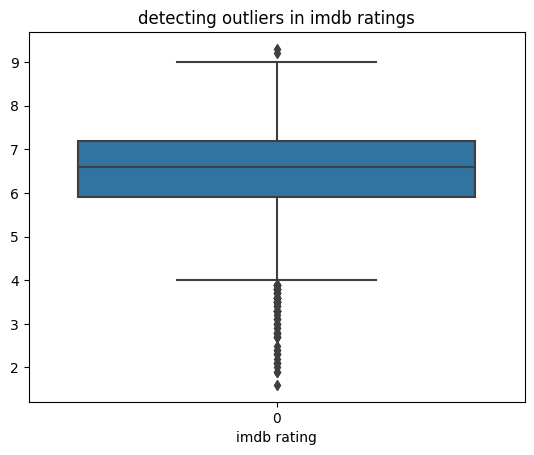

In [321]:
#detecting the outliers inthe imdb ratings
sns.boxplot(cinema["imdb_score"])
plt.title("detecting outliers in imdb ratings")
plt.xlabel("imdb rating")
plt.show()

In [322]:
#the movies with the imdb rating higher than or equal to 8.0 .
cinema[cinema["imdb_score"]>=8.0]

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,actor_3_name,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_profit,actors_fb_likes
3,Color,Christopher Nolan,164.0,22000,23000,Christian Bale,27000,448130642.0,Action|Thriller,Tom Hardy,...,1144337,Joseph Gordon-Levitt,English,USA,250000000.0,2012,23000,8.5,198130642.0,73000
25,Color,Anthony Russo,147.0,94,11000,Scarlett Johansson,21000,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,...,272670,Chris Evans,English,USA,250000000.0,2016,19000,8.2,157197282.0,51000
41,Color,Lee Unkrich,103.0,125,721,John Ratzenberger,15000,414984497.0,Adventure|Animation|Comedy|Family|Fantasy,Tom Hanks,...,544884,Don Rickles,English,USA,200000000.0,2010,1000,8.3,214984497.0,16721
45,Color,Bryan Singer,149.0,0,20000,Peter Dinklage,34000,233914986.0,Action|Adventure|Fantasy|Sci-Fi|Thriller,Jennifer Lawrence,...,514125,Hugh Jackman,English,USA,200000000.0,2014,22000,8.0,33914986.0,76000
55,Color,Andrew Stanton,98.0,475,522,Fred Willard,1000,223806889.0,Adventure|Animation|Family|Sci-Fi,John Ratzenberger,...,718837,Jeff Garlin,English,USA,180000000.0,2008,729,8.4,43806889.0,2251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,Color,Marius A. Markevicius,89.0,6,8,Greg Speirs,14,133778.0,Documentary|Sport,Tommy Sheppard,...,3086,Mickey Hart,English,USA,500000.0,2012,9,8.4,-366222.0,31
3750,Color,Terry Gilliam,91.0,0,332,Michael Palin,795,1229197.0,Adventure|Comedy|Fantasy,Eric Idle,...,382240,Terry Jones,English,UK,229575.0,1975,561,8.3,999622.0,1688
3769,Black and White,Michael Roemer,95.0,0,87,Gloria Foster,581,12438.0,Drama|Romance,Yaphet Kotto,...,891,Ivan Dixon,English,USA,160000.0,1964,99,8.1,-147562.0,767
3793,Color,Sergio Leone,99.0,0,93,Gian Maria Volontè,16000,3500000.0,Action|Drama|Western,Clint Eastwood,...,147566,Aldo Sambrell,Italian,Italy,200000.0,1964,360,8.0,3300000.0,16453


**GROSS**  
it is positively skewed.  
it has some outliers.  
the min is 162GBP and maxi is ABOVE 760 million GBP.



In [323]:
cinema['gross'].describe()

count    3.847000e+03
mean     5.101866e+07
std      6.935314e+07
min      1.620000e+02
25%      6.846847e+06
50%      2.797241e+07
75%      6.551753e+07
max      7.605058e+08
Name: gross, dtype: float64

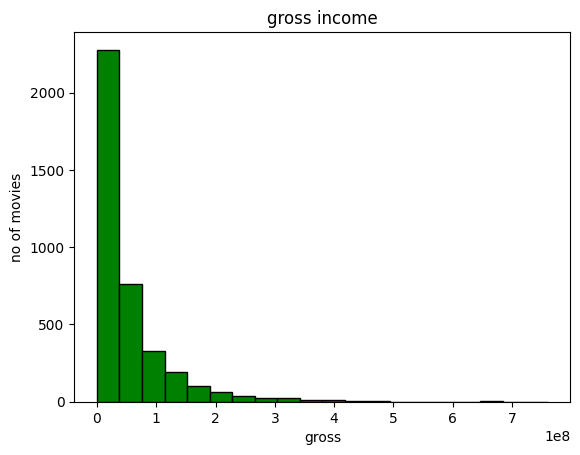

In [324]:

plt.hist(cinema["gross"],bins= 20,edgecolor="black",color="green")
plt.title("gross income")
plt.xlabel("gross")
plt.ylabel("no of movies")

plt.show()

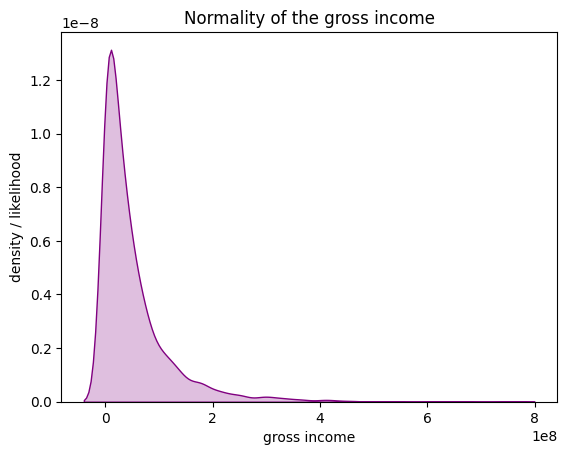

In [325]:

sns.kdeplot(cinema["gross"],fill=True,color="purple")
plt.title("Normality of the gross income")
plt.xlabel("gross income")
plt.ylabel("density / likelihood")
plt.show()

In [326]:
cinema['gross'].skew()

2.9956637564680078

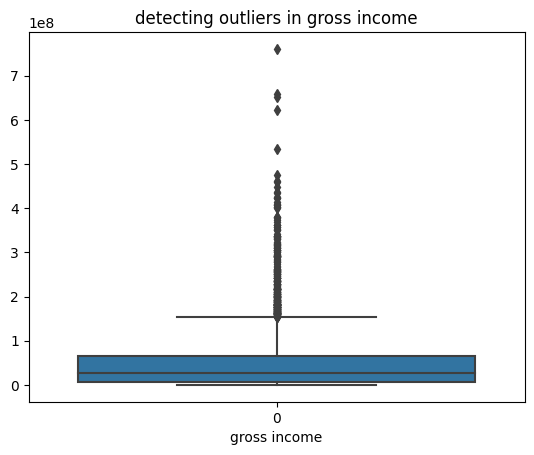

In [327]:

sns.boxplot(cinema["gross"])
plt.title("detecting outliers in gross income")
plt.xlabel("gross income")
plt.show()

In [328]:
cinema[cinema["gross"]>=500000000.00]

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,actor_3_name,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_profit,actors_fb_likes
0,Color,James Cameron,178.0,0,855,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,886204,Wes Studi,English,USA,237000000.0,2009,936,7.9,523505847.0,2791
24,Color,James Cameron,194.0,0,794,Kate Winslet,29000,658672302.0,Drama|Romance,Leonardo DiCaprio,...,793059,Gloria Stuart,English,USA,200000000.0,1997,14000,7.7,458672302.0,43794
27,Color,Colin Trevorrow,124.0,365,1000,Judy Greer,3000,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,...,418214,Omar Sy,English,USA,150000000.0,2015,2000,7.0,502177271.0,6000
62,Color,Christopher Nolan,152.0,22000,11000,Heath Ledger,23000,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,...,1676169,Morgan Freeman,English,USA,185000000.0,2008,13000,9.0,348316061.0,47000
748,Color,Joss Whedon,173.0,0,19000,Robert Downey Jr.,26000,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,995415,Scarlett Johansson,English,USA,220000000.0,2012,21000,8.1,403279547.0,66000


**BUDGET**  
it is positively skewed.
it has many outliers.  
the min is 218 GBP and max is ABOVE 12billion GBP.


In [329]:
cinema["budget"].describe()

count    3.847000e+03
mean     4.527174e+07
std      2.235825e+08
min      2.180000e+02
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      1.221550e+10
Name: budget, dtype: float64

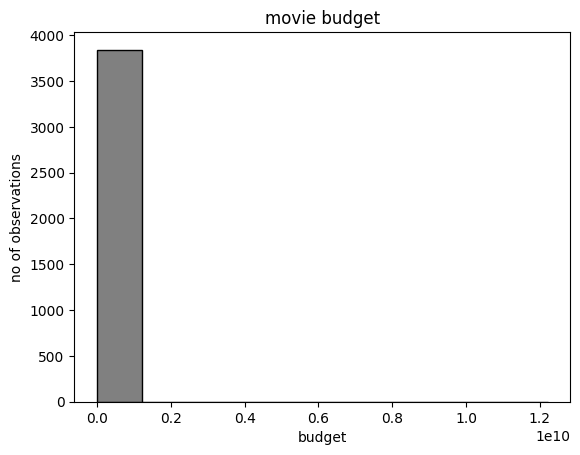

In [330]:

plt.hist(cinema["budget"],bins= 10,edgecolor="black",color="grey")
plt.title("movie budget")
plt.xlabel("budget")
plt.ylabel("no of observations")

plt.show()

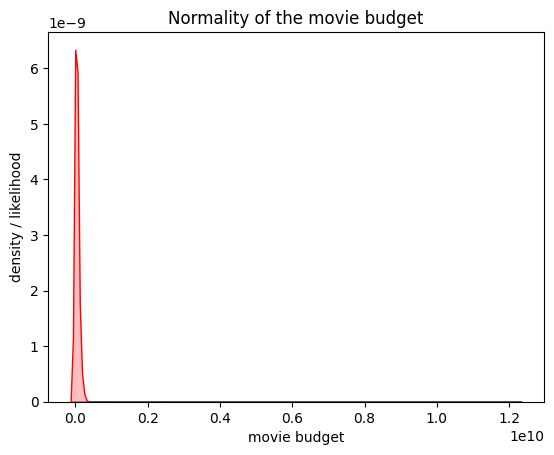

In [331]:

sns.kdeplot(cinema["budget"],fill=True,color="red")
plt.title("Normality of the movie budget")
plt.xlabel("movie budget")
plt.ylabel("density / likelihood")
plt.show()

In [332]:
cinema["budget"].skew()

44.5652838179805

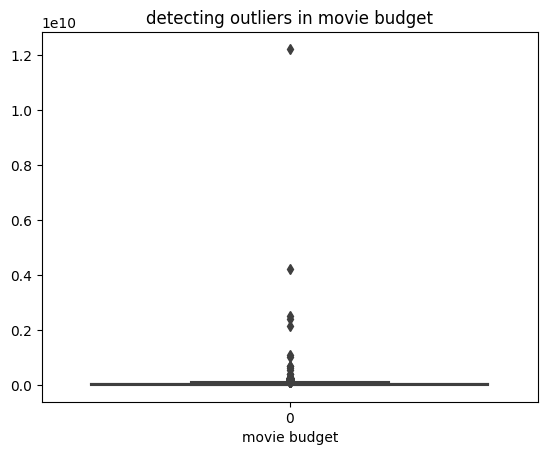

In [333]:
sns.boxplot(cinema["budget"])
plt.title("detecting outliers in movie budget")
plt.xlabel("movie budget")
plt.show()

In [334]:
cinema[cinema['budget']>=2000000000.00]

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,actor_3_name,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_profit,actors_fb_likes
2127,Color,Hayao Miyazaki,134.0,6000,745,Jada Pinkett Smith,893,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,...,221552,Billy Crudup,Japanese,Japan,2.400000e+09,1997,851,8.4,-2.397702e+09,2489
2138,Color,Katsuhiro Ôtomo,103.0,78,101,Robin Atkin Downes,488,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,...,13727,Rosalind Ayres,Japanese,Japan,2.127520e+09,2004,336,6.9,-2.127110e+09,925
2669,Color,Joon-ho Bong,110.0,584,74,Kang-ho Song,629,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,...,68883,Ah-sung Ko,Korean,South Korea,1.221550e+10,2006,398,7.0,-1.221330e+10,1101
2684,Color,Lajos Koltai,134.0,45,0,Péter Fancsikai,9,195888.0,Drama|Romance|War,Marcell Nagy,...,5603,Bálint Péntek,Hungarian,Hungary,2.500000e+09,2005,2,7.1,-2.499804e+09,11
3272,Color,Chan-wook Park,112.0,0,38,Yeong-ae Lee,717,211667.0,Crime|Drama,Min-sik Choi,...,53508,Hye-jeong Kang,Korean,South Korea,4.200000e+09,2005,126,7.7,-4.199788e+09,881


**NUMBER OF USERS VOTED**  
it is positively skewed.  
there are outliers.  
the min no. of voted users are 5 and max is OVER 1 million people.

In [335]:
cinema["num_voted_users"].describe()

count    3.847000e+03
mean     1.025429e+05
std      1.503771e+05
min      5.000000e+00
25%      1.732500e+04
50%      5.065300e+04
75%      1.242320e+05
max      1.689764e+06
Name: num_voted_users, dtype: float64

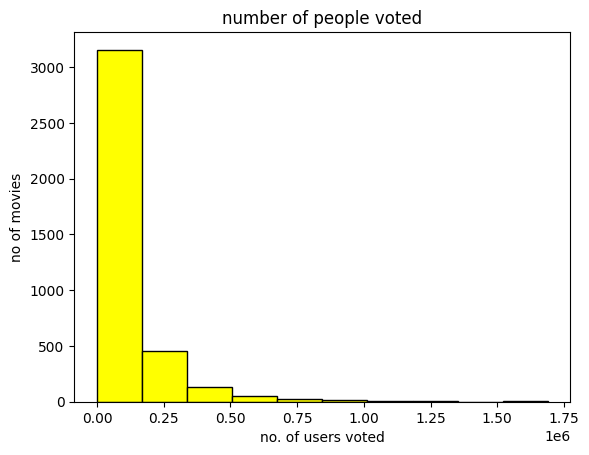

In [336]:

plt.hist(cinema["num_voted_users"],bins= 10,edgecolor="black",color="yellow")
plt.title("number of people voted")
plt.xlabel("no. of users voted")
plt.ylabel("no of movies")

plt.show()

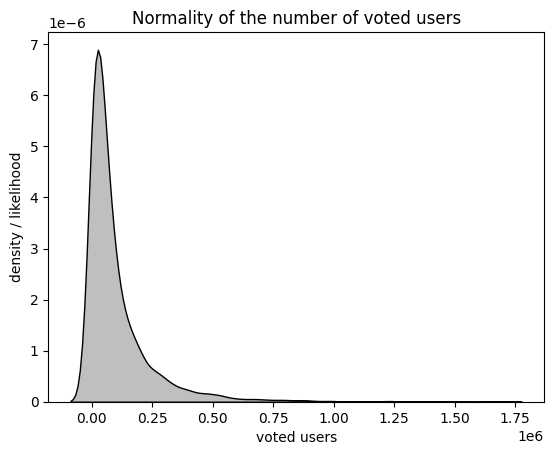

In [337]:
sns.kdeplot(cinema["num_voted_users"],fill=True,color="black")
plt.title("Normality of the number of voted users")
plt.xlabel("voted users")
plt.ylabel("density / likelihood")
plt.show()

In [338]:
cinema['num_voted_users'].skew()

3.6857045282060956

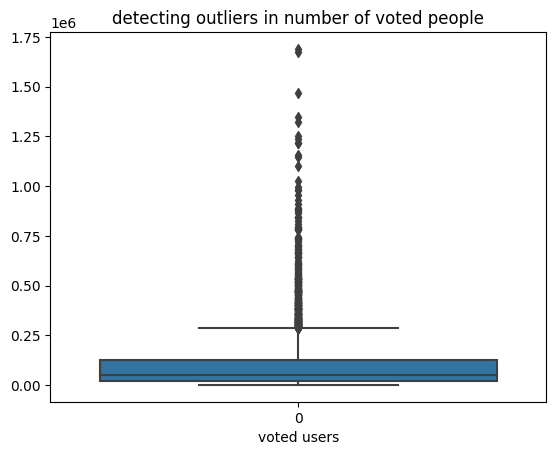

In [339]:
sns.boxplot(cinema["num_voted_users"])
plt.title("detecting outliers in number of voted people")
plt.xlabel("voted users")
plt.show()

In [340]:
cinema[cinema['num_voted_users']>=1100000]

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,actor_3_name,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_profit,actors_fb_likes
3,Color,Christopher Nolan,164.0,22000,23000,Christian Bale,27000,448130642.0,Action|Thriller,Tom Hardy,...,1144337,Joseph Gordon-Levitt,English,USA,250000000.0,2012,23000,8.5,198130642.0,73000
62,Color,Christopher Nolan,152.0,22000,11000,Heath Ledger,23000,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,...,1676169,Morgan Freeman,English,USA,185000000.0,2008,13000,9.0,348316061.0,47000
92,Color,Christopher Nolan,148.0,22000,23000,Tom Hardy,29000,292568851.0,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,...,1468200,Joseph Gordon-Levitt,English,USA,160000000.0,2010,27000,8.8,132568851.0,79000
253,Color,Peter Jackson,171.0,0,857,Orlando Bloom,16000,313837577.0,Action|Adventure|Drama|Fantasy,Christopher Lee,...,1238746,Billy Boyd,English,New Zealand,93000000.0,2001,5000,8.8,220837577.0,21857
320,Color,Peter Jackson,192.0,0,416,Billy Boyd,5000,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,...,1215718,Bernard Hill,English,USA,94000000.0,2003,857,8.9,283019252.0,6273
321,Color,Peter Jackson,172.0,0,857,Orlando Bloom,16000,340478898.0,Action|Adventure|Drama|Fantasy,Christopher Lee,...,1100446,Billy Boyd,English,USA,94000000.0,2002,5000,8.7,246478898.0,21857
616,Color,Lana Wachowski,136.0,0,99,Marcus Chong,18000,171383253.0,Action|Sci-Fi,Keanu Reeves,...,1217752,Gloria Foster,English,USA,63000000.0,1999,145,8.7,108383253.0,18244
643,Color,David Fincher,151.0,21000,637,Meat Loaf,11000,37023395.0,Drama,Brad Pitt,...,1347461,Eugenie Bondurant,English,USA,63000000.0,1999,783,8.8,-25976605.0,12420
785,Black and White,Robert Zemeckis,142.0,0,194,Siobhan Fallon Hogan,15000,329691196.0,Comedy|Drama,Tom Hanks,...,1251222,Sam Anderson,English,USA,55000000.0,1994,294,8.8,274691196.0,15488
1791,Color,Frank Darabont,142.0,0,461,Jeffrey DeMunn,11000,28341469.0,Crime|Drama,Morgan Freeman,...,1689764,Bob Gunton,English,USA,25000000.0,1994,745,9.3,3341469.0,12206


## BI - VARIATE ANALYSIS

## BUDGET VS GROSS
the gross is not depending on the budget.

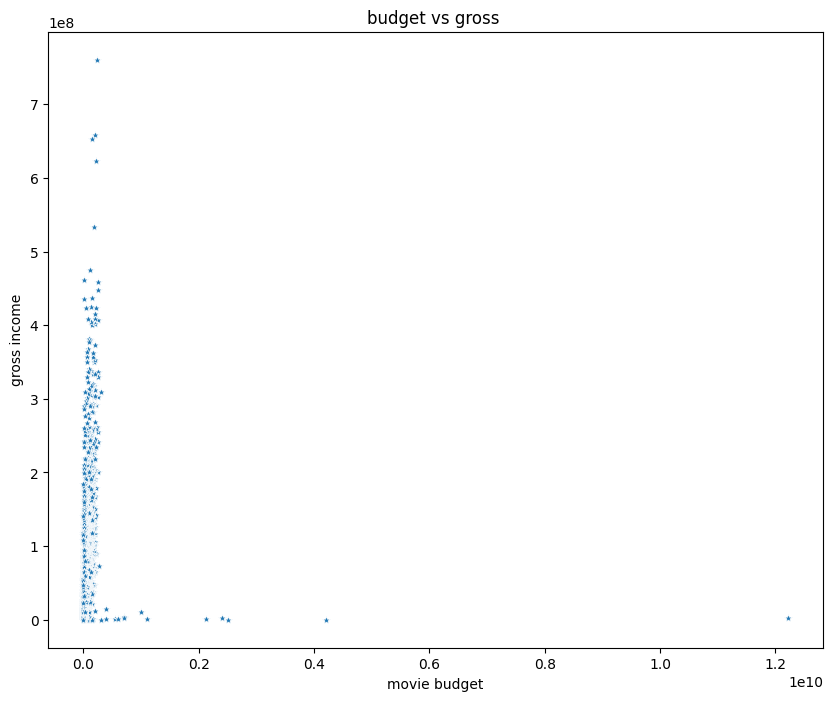

In [341]:
plt.figure(figsize=(10,8))#the budget vs gross gives the relation between them
sns.scatterplot(x= "budget",y = "gross",marker='*',data=cinema)
plt.title("budget vs gross ")
plt.xlabel("movie budget")
plt.ylabel("gross income")
plt.show()

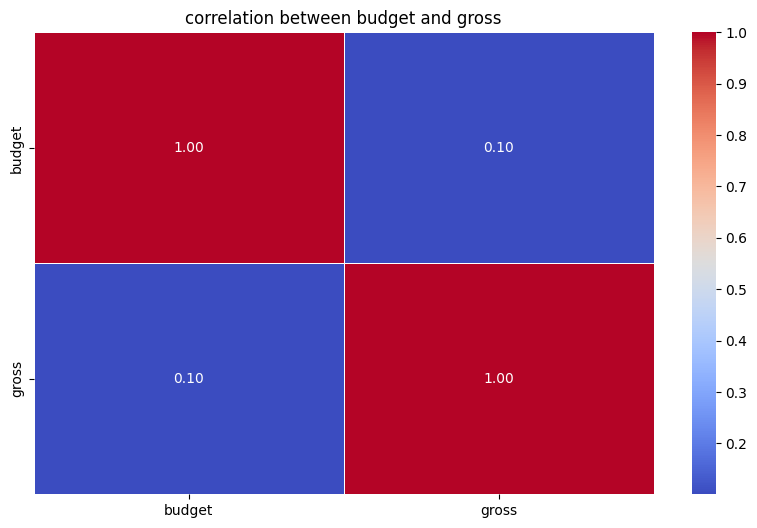

In [342]:

correlation = cinema[["budget","gross"]].corr()#calculating the correlation
plt.figure(figsize = (10,6))
sns.heatmap(correlation,cmap="coolwarm",annot = True,fmt=".2f",linewidths=.5)
plt.title("correlation between budget and gross")
plt.show()

* there is no correlation between the gross and the budget.  
* the correlation lies between -1 to 1 .here, budget vs gross is 0.10 so, there is no correlation.

## MAKING OUR BUDGET OF LESS THAN OR EQUAL TO 1.5 MILLIONS.

In [343]:
our_budget_movies = cinema[cinema['budget'] <= 1500000]
#making our own budget less than or equals to 1.5 million(GBP)


## OVERALL BUDGT VS PROFIT
* if the budget the profit is not changing.

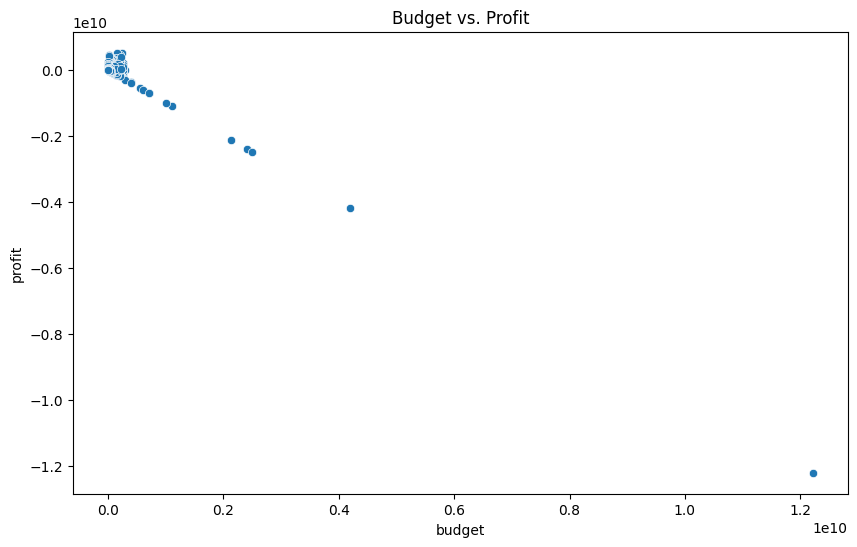

In [344]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='movie_profit', data=cinema)
plt.title('Budget vs. Profit')
plt.xlabel("budget")
plt.ylabel("profit")
plt.show()

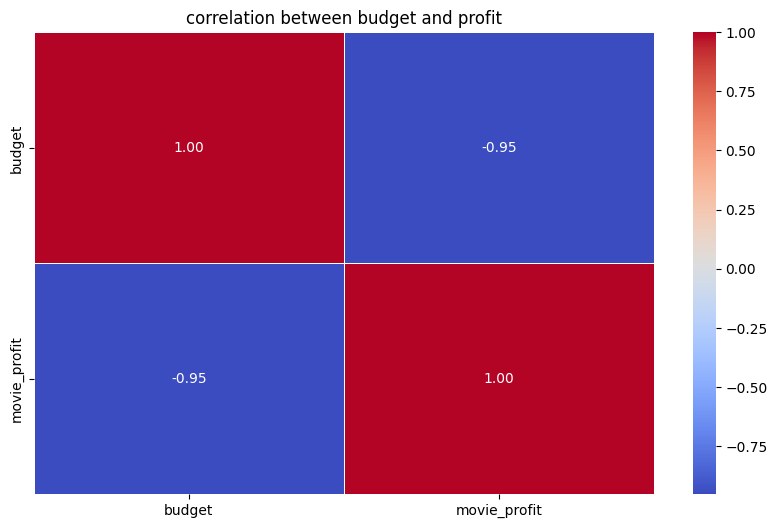

In [345]:
correlation = cinema[["budget","movie_profit"]].corr()#calculating the correlation
plt.figure(figsize = (10,6))
sns.heatmap(correlation,cmap="coolwarm",annot = True,fmt=".2f",linewidths=.5)
plt.title("correlation between budget and profit")
plt.show()

## IMDB RATING VS PROFIT
* movies with imdb rating more than 6 are making more money.

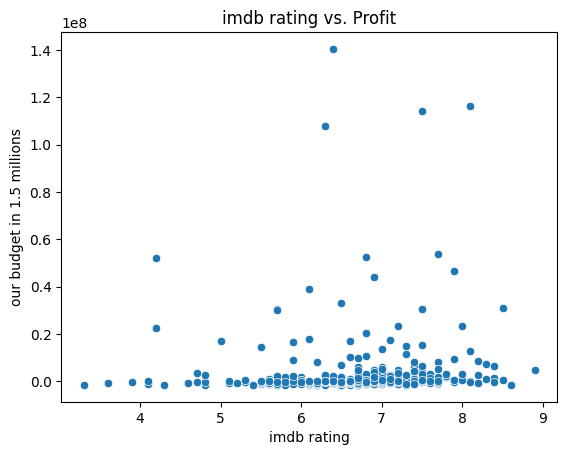

In [346]:
our_budget_movies = cinema[cinema['budget'] <= 1500000]
sns.scatterplot(x='imdb_score', y='movie_profit', data=our_budget_movies)
plt.title('imdb rating vs. Profit')
plt.xlabel("imdb rating")
plt.ylabel('our budget in 1.5 millions')
plt.show()

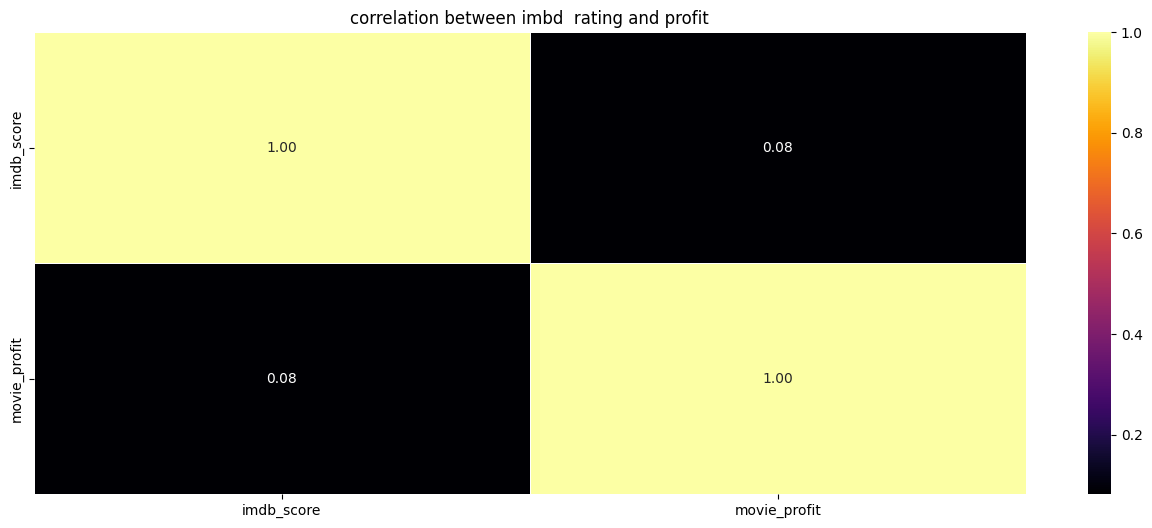

In [347]:
correlation = our_budget_movies[["imdb_score","movie_profit"]].corr()
plt.figure(figsize = (16,6))
sns.heatmap(correlation,cmap="inferno",annot = True,fmt=".2f",linewidths=.5)
plt.title("correlation between imbd  rating and profit")
plt.show()

## POPULARITY VS PROFIT
*It showing that the popularity of the acting figures is not making much impact on the profit.

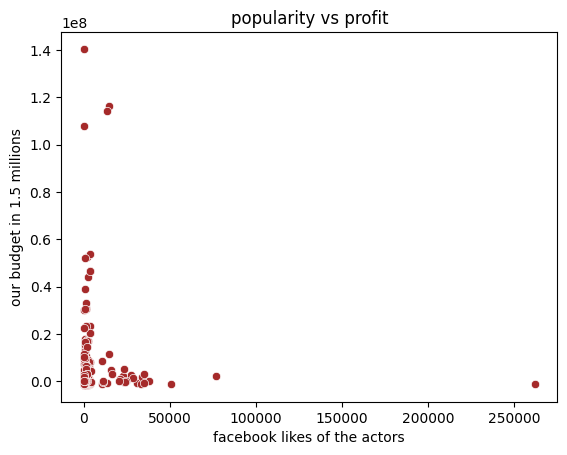

In [348]:
sns.scatterplot(x='actors_fb_likes', y='movie_profit', data=our_budget_movies,color="brown")
plt.title('popularity vs profit')
plt.xlabel('facebook likes of the actors')
plt.ylabel("our budget in 1.5 millions")
plt.show()

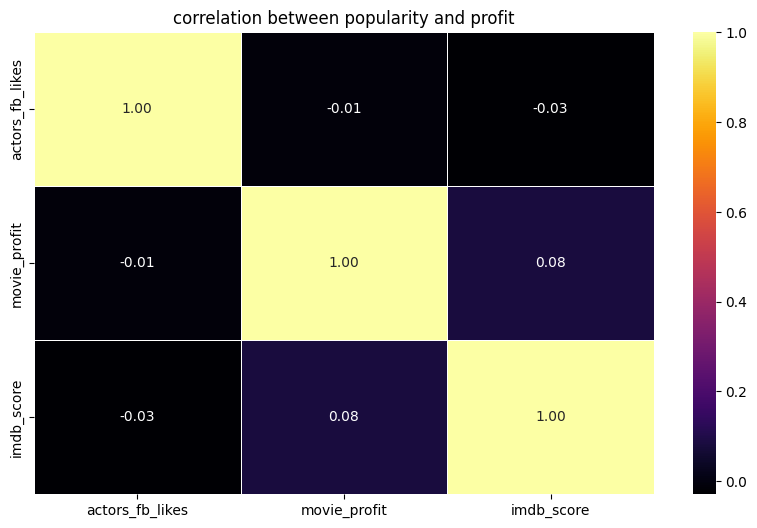

In [349]:
correlation = our_budget_movies[["actors_fb_likes","movie_profit","imdb_score"]].corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation,cmap="inferno",annot = True,fmt=".2f",linewidths=.5)
plt.title("correlation between popularity and profit")
plt.show()

## DURATION VS PROFIT
* when movie is of 75minutes is making more money in box office.

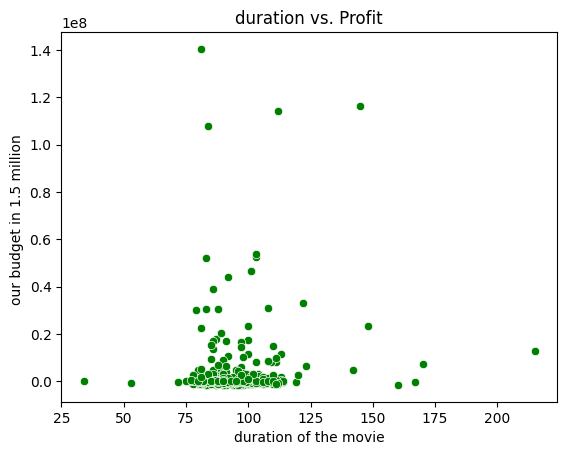

In [350]:
sns.scatterplot(x='duration', y='movie_profit', data=our_budget_movies,color = "green")
plt.title('duration vs. Profit')
plt.xlabel('duration of the movie')
plt.ylabel("our budget in 1.5 million ")
plt.show()

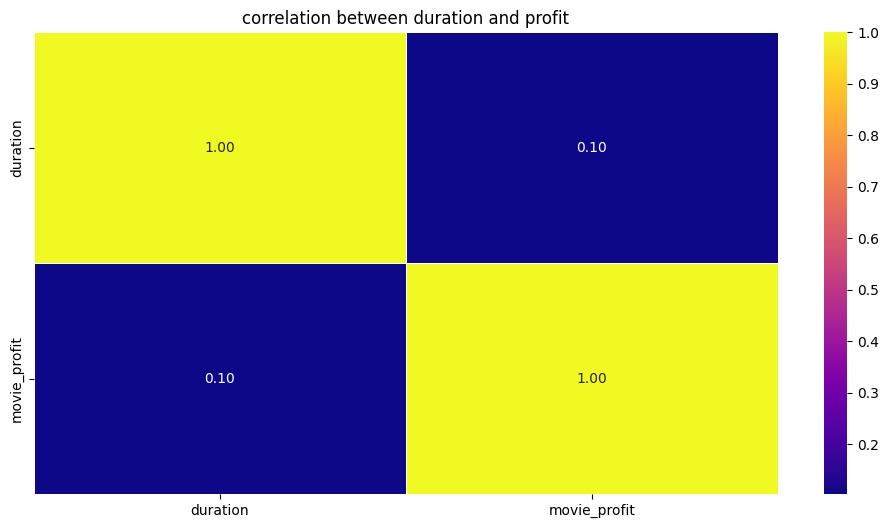

In [351]:
correlation = our_budget_movies[["duration","movie_profit"]].corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation,cmap="plasma",annot = True,fmt=".2f",linewidths=.5)
plt.title("correlation between duration and profit")
plt.show()

## LANGUAGE VS PROFIT
the language english is making more money.

In [352]:
# taking top 35 languages with in our budget
top_languages = our_budget_movies['language'].value_counts().head(35).index
languages_35 = our_budget_movies[our_budget_movies['language'].isin(top_languages)]



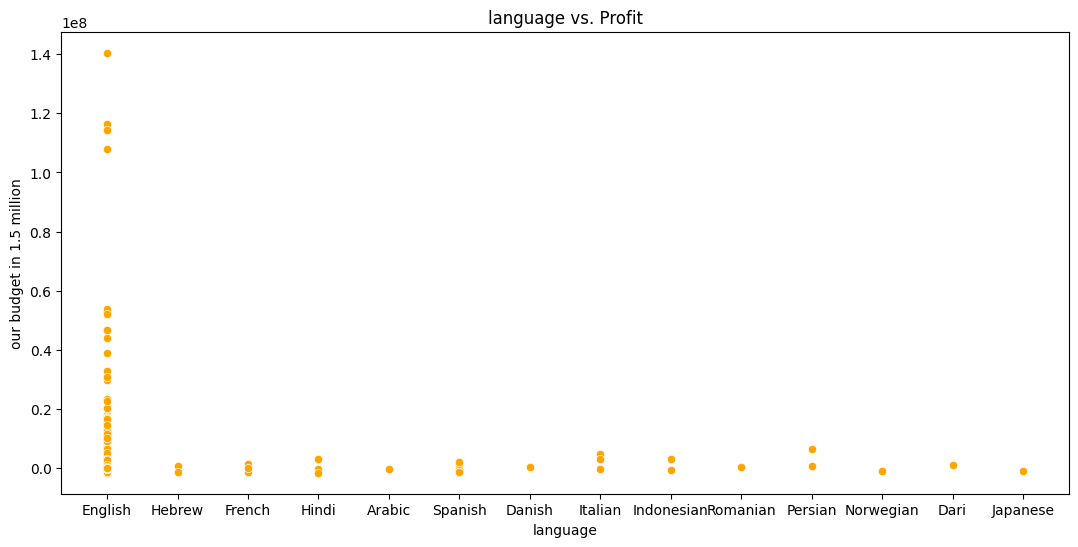

In [353]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x='language', y='movie_profit', data=languages_35,color='orange')
plt.title('language vs. Profit')
plt.xlabel("language")
plt.ylabel("our budget in 1.5 million")
plt.show()

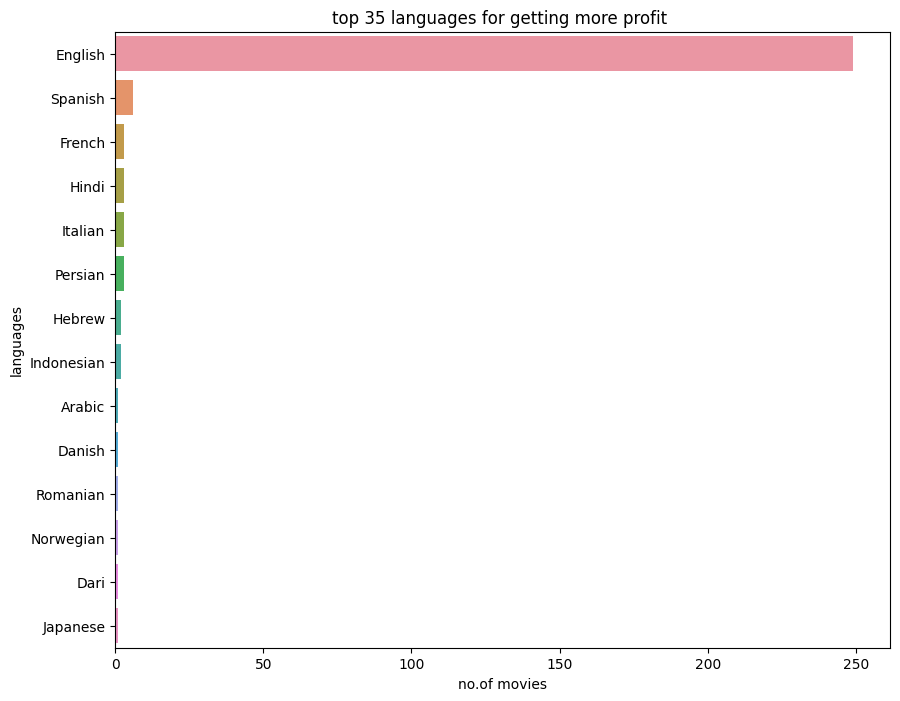

In [354]:
plt.figure(figsize=(10, 8))
sns.countplot(y='language', data=our_budget_movies, order=our_budget_movies['language'].value_counts().nlargest(35).index)
plt.title('top 35 languages for getting more profit ')
plt.xlabel('no.of movies')
plt.ylabel('languages')
plt.show()

##  DIRECTOR VS PROFIT
we got best director as the alfred hitchcock.   
but the alfred hitchcock done his movie in 1960. According our analysis,movies released in 20's making more profit.  
we Ari Folman as a director because it released movie in 2008 under our budget and got success.


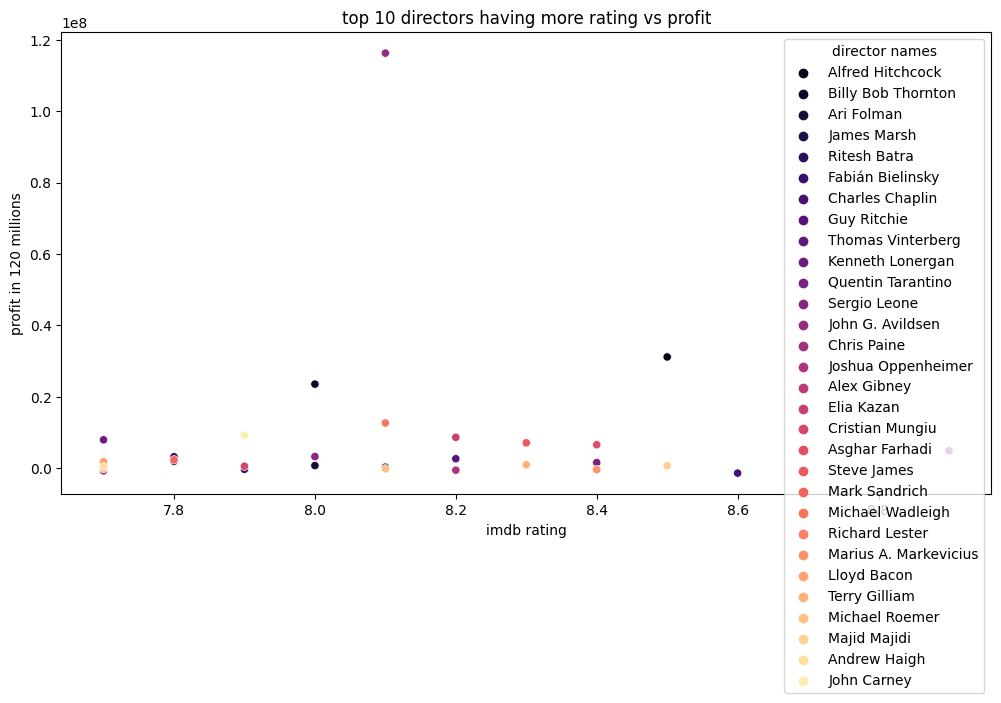

In [355]:

directors = our_budget_movies.groupby('director_name')['imdb_score'].mean().nlargest(30).index
# filtering the data having the top 10 directors
director_data = our_budget_movies[our_budget_movies['director_name'].isin(directors)]

plt.figure(figsize=(12,6))
sns.scatterplot(x="imdb_score",y="movie_profit",hue='director_name',data=director_data,palette="magma")
plt.title('top 10 directors having more rating vs profit')
plt.xlabel("imdb rating")
plt.ylabel("profit in 120 millions")
plt.legend(title="director names")
plt.show()


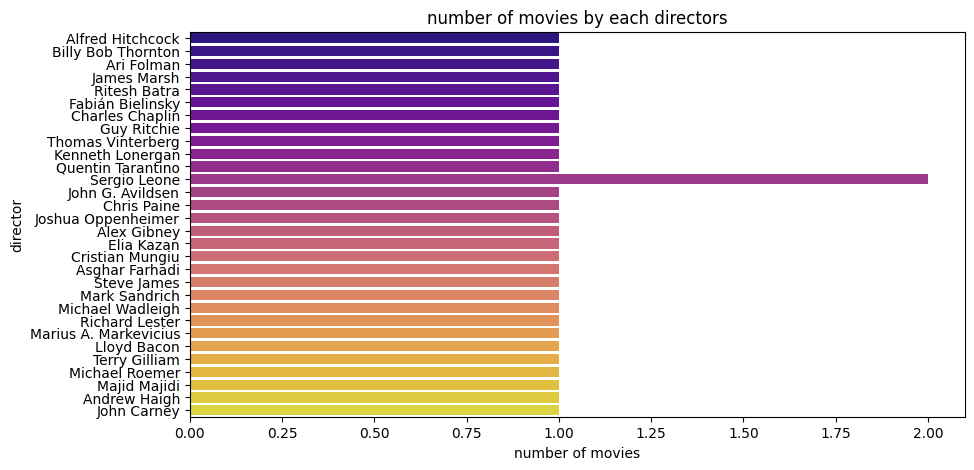

In [356]:

plt.figure(figsize=(10,5))
sns.countplot(y= "director_name",data=director_data,palette= "plasma")
plt.title("number of movies by each directors")
plt.xlabel('number of movies')
plt.ylabel("director")
plt.show()

In [357]:
cinema[cinema["director_name"]=="Ari Folman"]["budget"]

3502    1500000.0
Name: budget, dtype: float64

## GENRES VS PROFIT
* the genres from Horror is making more profit.

In [358]:
genres_top= our_budget_movies['genres'].value_counts().head(10).index
genres_10 = our_budget_movies[our_budget_movies['genres'].isin(genres_top)]

#taking the top 10 genres with in the our budget

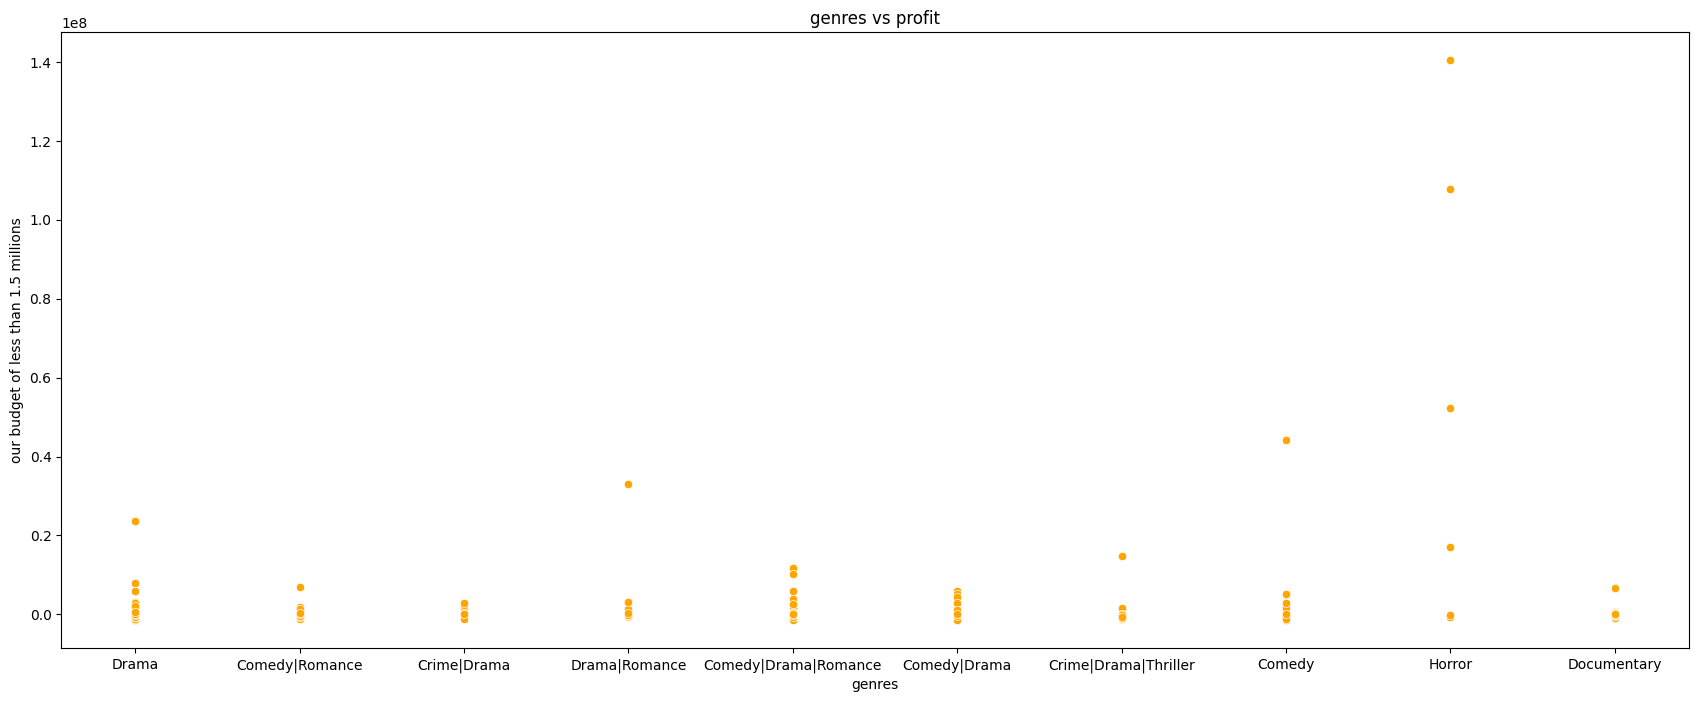

In [359]:
plt.figure(figsize=(21, 8))
sns.scatterplot(x='genres', y='movie_profit', data=genres_10,color="orange")
plt.title('genres vs profit')
plt.xlabel('genres')
plt.ylabel("our budget of less than 1.5 millions")
plt.show()

In [360]:
cinema[cinema["genres"]=="Horror"].head(2)


,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,actor_3_name,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_profit,actors_fb_likes
1146,Color,David R. Ellis,82.0,160,748,Andrew Fiscella,164000,66466372.0,Horror,Krista Allen,...,75345,Shantel VanSanten,English,USA,40000000.0,2009,137000,5.2,26466372.0,301748
1182,Color,Steven Quale,92.0,77,495,Jacqueline MacInnes Wood,703,42575718.0,Horror,Emma Bell,...,83788,Courtney B. Vance,English,USA,40000000.0,2011,682,5.9,2575718.0,1880


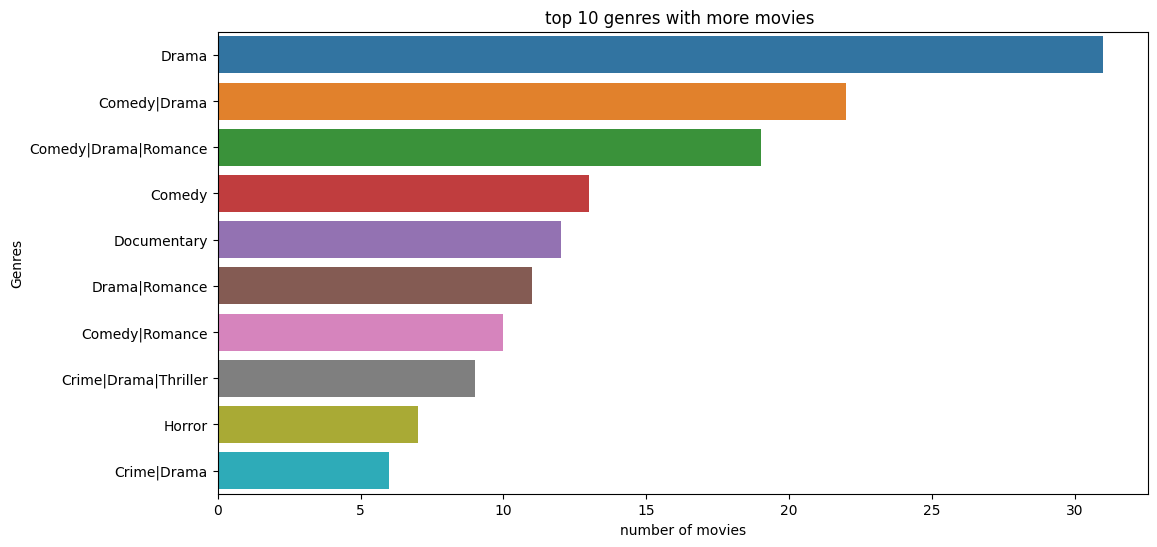

In [361]:
plt.figure(figsize=(12, 6))
sns.countplot(y='genres', data=genres_10, order=genres_top)
plt.title('top 10 genres with more movies ')
plt.xlabel('number of movies')
plt.ylabel('Genres')
plt.show()

## movie release vs profit
*the movies released in 2000's are getting more profit.

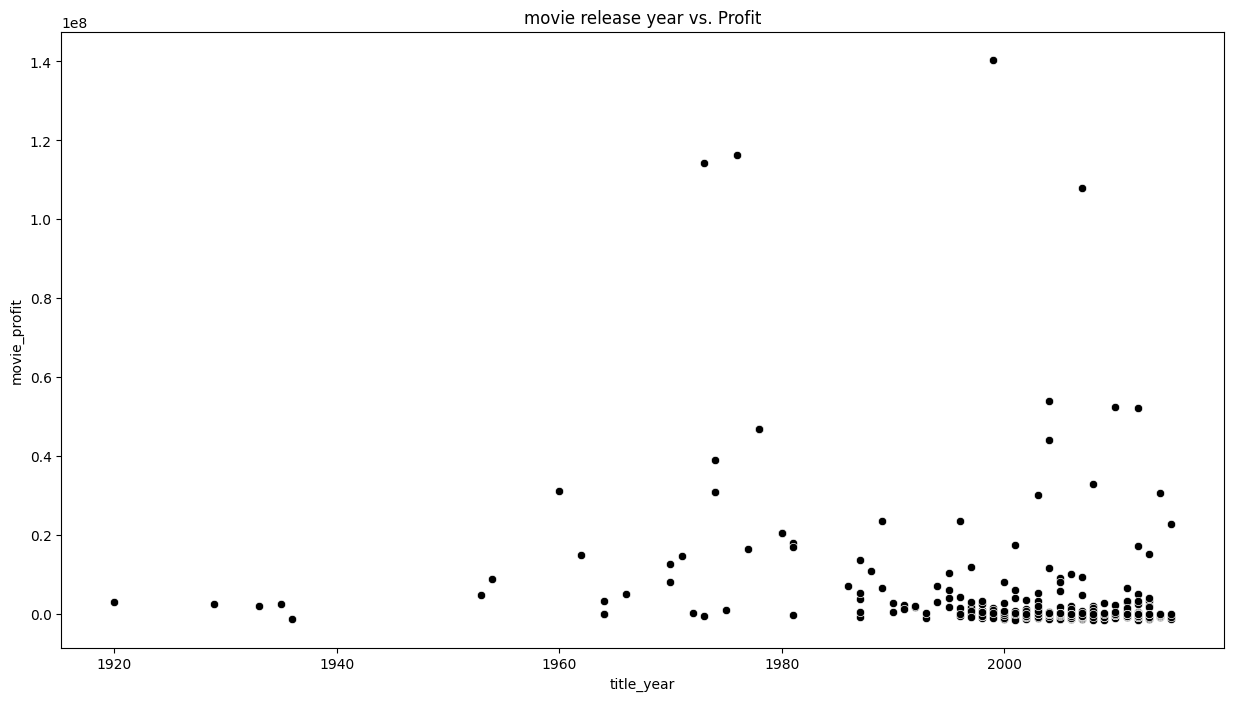

In [362]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='title_year', y='movie_profit', data=our_budget_movies,color="black")
plt.title('movie release year vs. Profit')
plt.show()

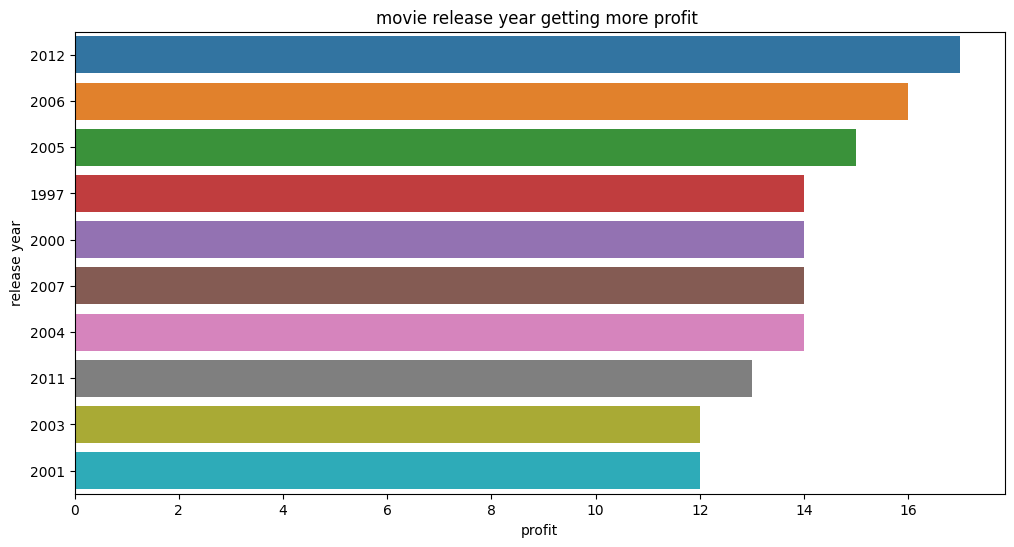

In [363]:
plt.figure(figsize=(12, 6))
sns.countplot(y='title_year', data=our_budget_movies, order=our_budget_movies['title_year'].value_counts().nlargest(10).index)
plt.title('movie release year getting more profit ')
plt.xlabel('profit')
plt.ylabel('release year')
plt.show()

## **country vs profit**
* the movie released in USA  making more profit.

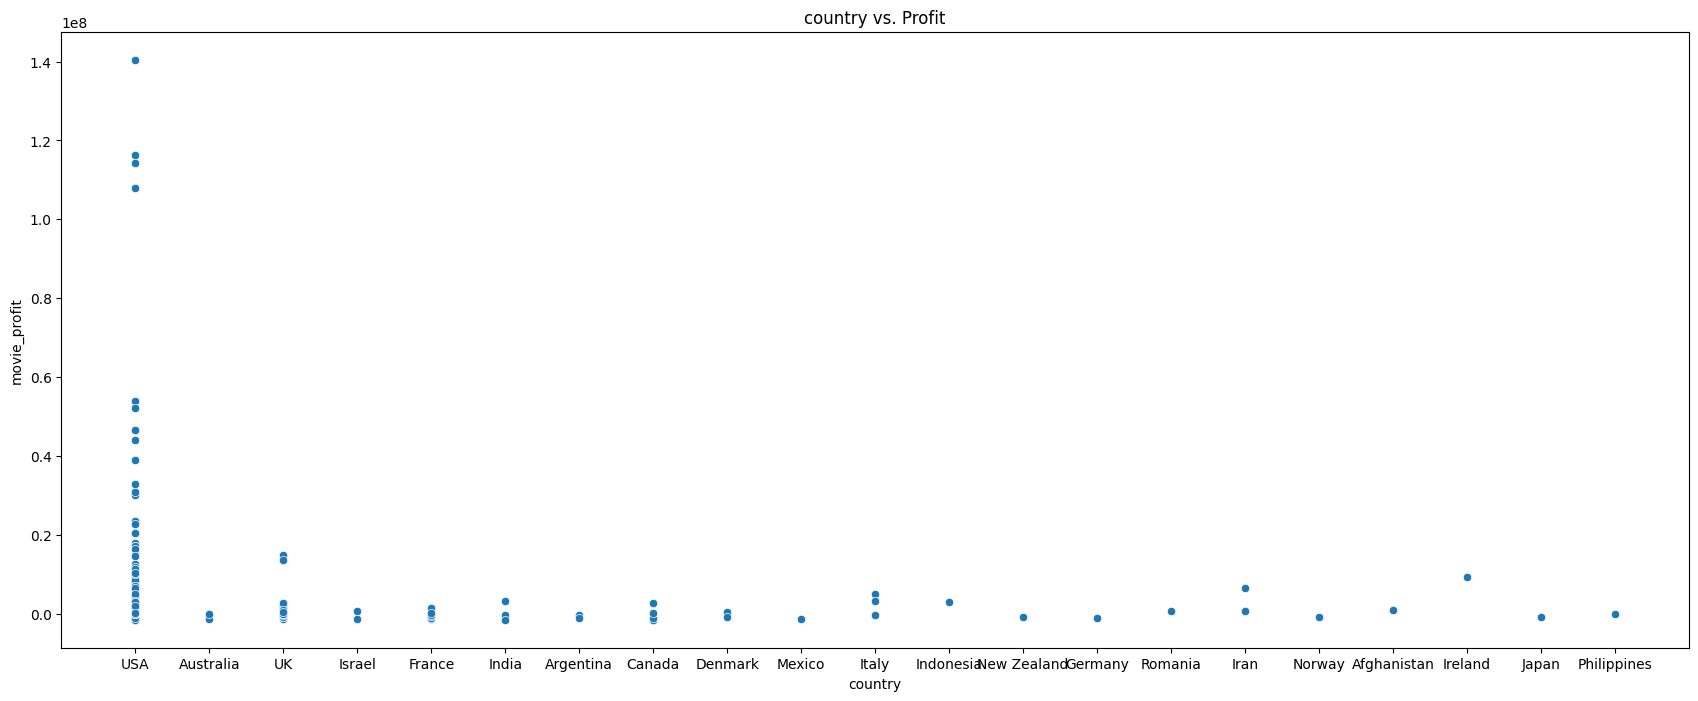

In [364]:
plt.figure(figsize=(21, 8))
sns.scatterplot(x='country', y='movie_profit', data=our_budget_movies)
plt.title('country vs. Profit')
plt.show()

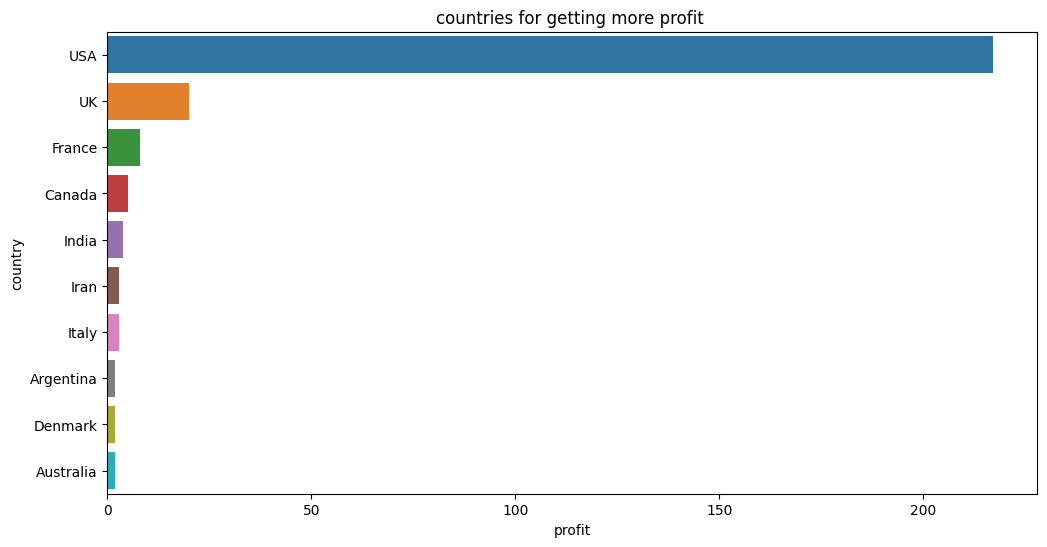

In [365]:
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=our_budget_movies, order=our_budget_movies['country'].value_counts().nlargest(10).index)
plt.title('countries for getting more profit ')
plt.xlabel('profit')
plt.ylabel('country')
plt.show()

## CORRELATION BETWEEN THE FEATURES UNDER THE BUDGET OF 1.5 MILLIONS .

<ipython-input-366-df534be6ae75>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = our_budget_movies[["duration","movie_profit","title_year","country",'language',"gross",'actors_fb_likes']].corr()


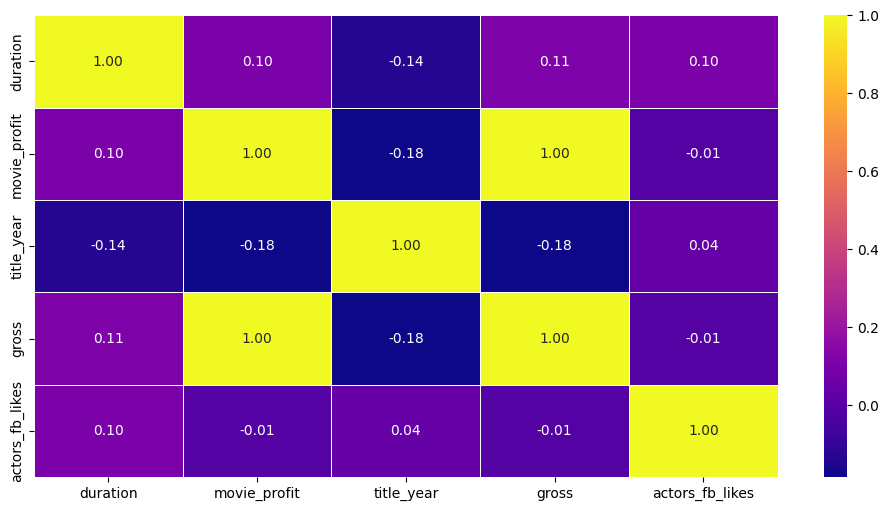

In [366]:
correlation = our_budget_movies[["duration","movie_profit","title_year","country",'language',"gross",'actors_fb_likes']].corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation,cmap="plasma",annot = True,fmt=".2f",linewidths=.5)
plt.show()

## MULTI VARIATE ANALYSIS
continous columns: imdb_score,profit,gross,budget,duration.

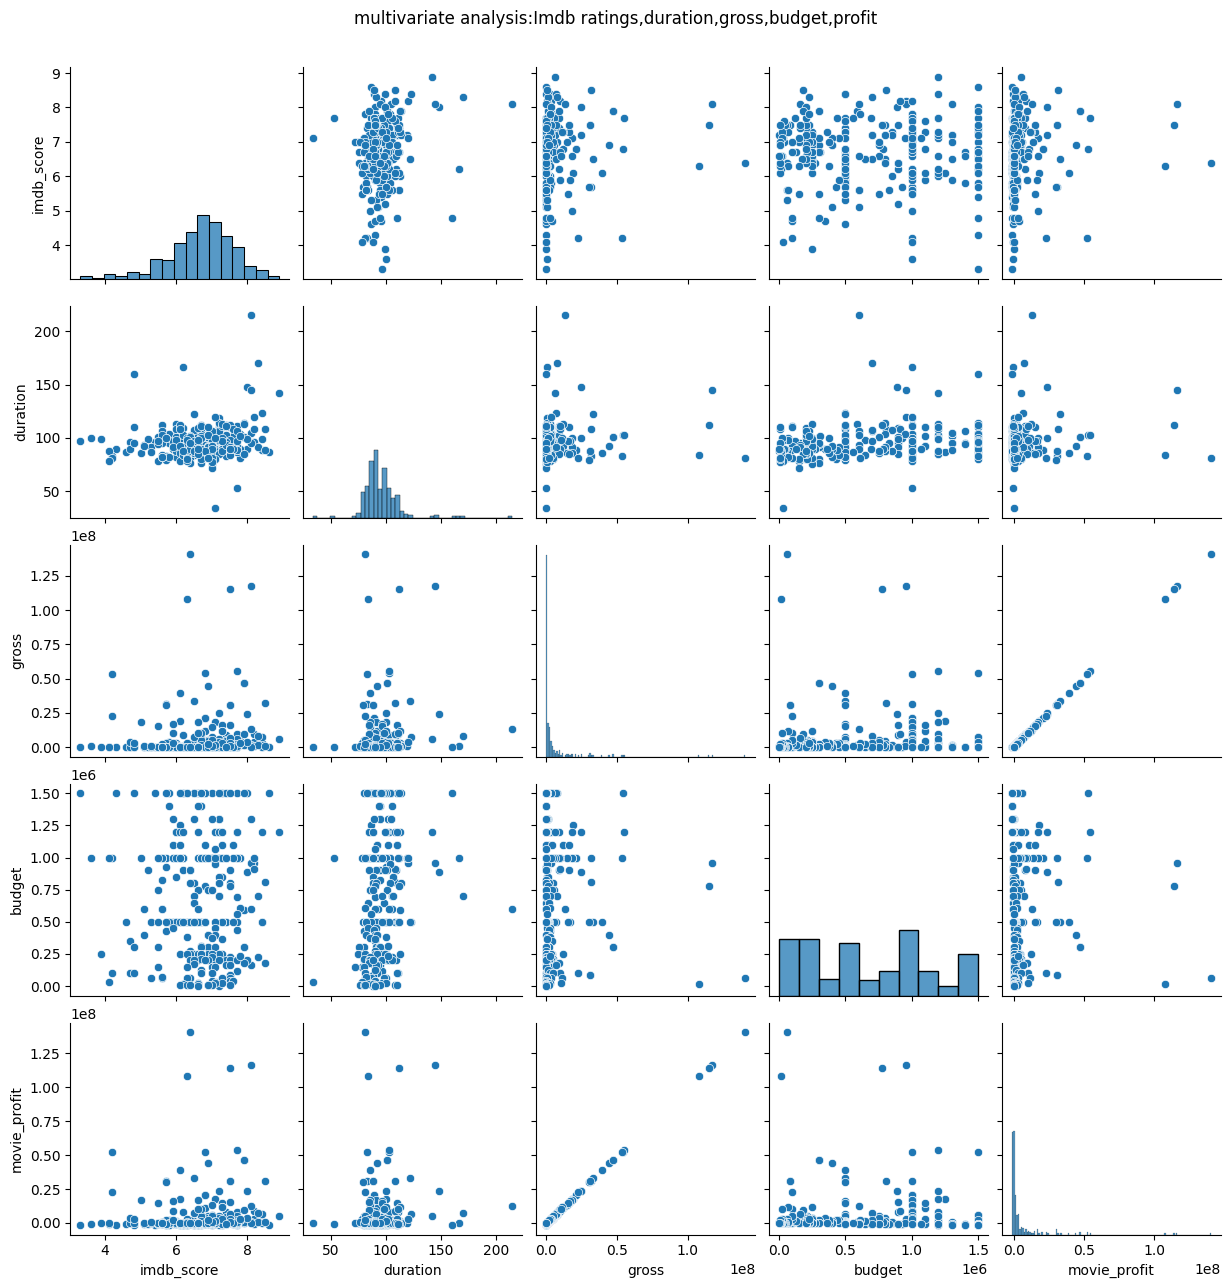

In [367]:
#multivariate analysis by pairplot

sns.pairplot(our_budget_movies[["imdb_score","duration","gross","budget","movie_profit"]])
plt.suptitle("multivariate analysis:Imdb ratings,duration,gross,budget,profit",y=1.03)
plt.show()


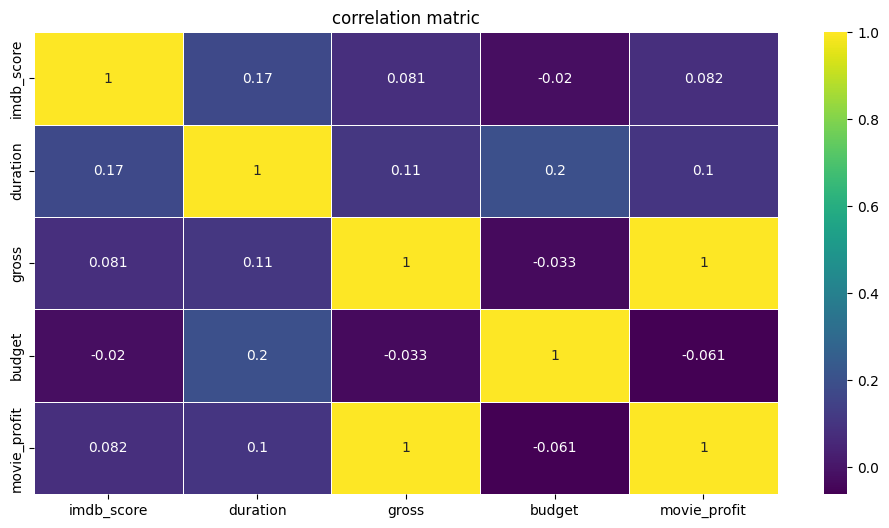

In [368]:
plt.figure(figsize=(12, 6))
correlation_matrix = our_budget_movies[["imdb_score","duration","gross","budget","movie_profit"]].corr()
sns.heatmap(correlation_matrix,annot = True,cmap="viridis",linewidths=0.6)
plt.title("correlation matric")
plt.show()

## TEST OF HYPOTHESIS
* FOR SELECTING THE GENRE.

* **H0** : There is no significant difference between the average profit of genre horror and with other genres.**M0 - M1 = 0**
* **H1** : There is significant difference between the average profit of genre horror and other genres.(average profit of horror genre is higher than other genres).**M0 - M1 > 0**

In [369]:
horror_profit = our_budget_movies[our_budget_movies['genres']=="Horror"]["movie_profit"]
others_profit = our_budget_movies[our_budget_movies["genres"]!= "Horror"]['movie_profit']


In [370]:
import scipy.stats as stats# the data is not in normal distribution and there is no much sample to go for normal
def test_of_hypothesis(d1,d2):#so we are going for the t test one tailed
  alpha = [0.01,0.05,0.1]#general consideration
  for a in alpha:
    t_stat,p_value = stats.ttest_ind(d1,d2, equal_var= False)#the variables are independent to each other
    if p_value/2 >= a:#as it is a two tailed test so we are dividing it with 2,
      print(f"failed to reject the hypothesis at {a} significant level")

    else:
      print(f"reject the null hypothesis at {a} significant level")



In [371]:
test_of_hypothesis(horror_profit,others_profit)

failed to reject the hypothesis at 0.01 significant level
failed to reject the hypothesis at 0.05 significant level
reject the null hypothesis at 0.1 significant level


from the above test of hypothesis,we came to know that by making the movie in the genre of horror can make more  profit compare to other genres with 90% of condifence level.

## TEST OF HYPOTHESIS
* FOR CONSIDERING THE DIRECTOR.

* **H0** : There is no significant difference between the impact of director **Ari Folman** regarding the profit  and with respect to other directors.**M0 - M1 = 0**
* **H1** : There is significant difference between the **Ari Folman** director with  other director for making movie hit.(profit made by ari folman is greater than others).**M0 - M1 > 0**

In [372]:
# divide the director from the other director
ari_folman = our_budget_movies[our_budget_movies['director_name']=="Ari Folman"]["movie_profit"]
others = our_budget_movies[our_budget_movies['director_name']!= "Ari Folman"]['movie_profit']


In [373]:
test_of_hypothesis(ari_folman,others)

reject the null hypothesis at 0.01 significant level
reject the null hypothesis at 0.05 significant level
reject the null hypothesis at 0.1 significant level


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


from the above test of hypothesis, we came to know that making a film by director **ARI FOLMAN** can get profit with compared to others directors by the condifence level of 95%.

## SUMMATION
I have analyzed the Movie meta data for making a movie that maximizies the profit for production house with in the budget constraint.Regarding this,I took optimal genre and director for getting more.First of all, I have done **Data cleaning** and **Data Wrangling** to get cleaned data by eliminating and **feature engineering** the columns.
    
Immediately the**8Exploratory Data Analysis** carried out by plotting graphs on the appropriate features ike genres,language,length of the movie,actors popularity,gross,budget,imdb score,title year and directors  for getting more insights and analysis.By analysing the data more I came to know that some top specific genres and directors are out of our consideration with the **budget issue**.Futhermore, I took the top  directors and genres which makes the **maximum profit** at box office.Moreover,there are many directors who directed movies in the 90's but  considering the **time trend ,budget and language** used I stick to **Ari Folman**.On the other hand, some top genres had only few movies it's not considerable for analysis.So, I opt for Horror genre which had enough **sample size** and made more profit's in given budget.  

 At last,**hypothesis** is performed  I could suggest Horror genre with **90% condifence** interval and Ari Folman director  with **95% condifence** level can make Sussex production team a **huge profit** .